In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statistics
from scipy.io import loadmat
import scipy.stats
from astropy.stats import bayesian_blocks

import seaborn as sns

# slightly nicer figures
sns.set_theme(style='white')
# sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title

In [3]:
syn_storms = loadmat('Carib_AL_LIBH_100 1.mat')
syn_storms

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Sep 20 11:03:25 2022',
 '__version__': '1.0',
 '__globals__': [],
 'C': array([[(array(['AL'], dtype='<U2'), array([[100]], dtype=uint8), array([[23.7833]]), array([[280.0667]]), array([[ 2,  2,  2, ...,  0,  0,  0],
                [25, 25, 25, ...,  0,  0,  0],
                [ 1,  1,  1, ...,  0,  0,  0],
                ...,
                [23, 23, 23, ...,  0,  0,  0],
                [27, 27, 27, ...,  0,  0,  0],
                [15, 15, 15, ...,  0,  0,  0]], dtype=uint8), array([[14.7987]]), array(['reanal'], dtype='<U6'), array([[11.3618]]), array([[18.337788, 19.190454, 17.591623, 23.157536, 17.903706, 14.574593,
                 26.620659, 15.160674, 16.52178 , 20.415186, 13.621477, 18.787451,
                 16.302193, 23.451643, 16.205126, 13.269671,  8.739775, 14.174782,
                 10.667288, 14.759171, 18.983757, 10.860116,  9.776212,  7.144966,
                  8.566869,  9.561316, 10.42

In [4]:
syn_storm_prop = pd.read_csv('/Users/christineblackshaw/Desktop/Year 1/Research - Bahamas/syn_props_necp_full.csv')
syn_storm_prop['Angle_rad'] = np.arctan(abs(syn_storm_prop.V/ syn_storm_prop.U))

for i in range(len(syn_storm_prop)):
    if (syn_storm_prop.U[i] < 0) & (syn_storm_prop.V[i] > 0):
        syn_storm_prop['Angle_rad'][i] = np.pi - syn_storm_prop['Angle_rad'][i]
    elif (syn_storm_prop.U[i] < 0) & (syn_storm_prop.V[i] < 0):
        syn_storm_prop['Angle_rad'][i] = np.pi + syn_storm_prop['Angle_rad'][i]
    elif (syn_storm_prop.U[i] > 0) & (syn_storm_prop.V[i] < 0):
        syn_storm_prop['Angle_rad'][i] = 2*np.pi - syn_storm_prop['Angle_rad'][i]

syn_storm_prop['Angle'] = np.degrees(syn_storm_prop['Angle_rad'])
syn_storm_prop

<ipython-input-4-13794166c463>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_storm_prop['Angle_rad'][i] = np.pi - syn_storm_prop['Angle_rad'][i]
<ipython-input-4-13794166c463>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_storm_prop['Angle_rad'][i] = np.pi + syn_storm_prop['Angle_rad'][i]
<ipython-input-4-13794166c463>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_storm_prop['Angle_rad'][i] = 2*np.pi - syn_storm_p

,Unnamed: 0,Unnamed: 0.1,Track,Year,Closest Passage (km),Angle of Passage,close_x,close_y,Vm_max,Vm_rmin,Rm_max,Rm_rmin,Direction,U,V,Max Surge (m),pass_libh,Angle_rad,Angle
0,0,0,1,1988,81.341191,252.529369,-75.337,22.566,23.782746,20.608627,120.09,35.22,NW,-0.669,0.191,0.410532,-81.341191,2.863490,164.065916
1,1,1,2,1988,32.131385,28.247133,-74.862,23.402,36.911357,22.774436,120.45,32.00,NW,-0.127,0.411,0.833903,32.131385,1.870492,107.171276
2,2,2,3,1988,84.678669,55.143343,-74.681,23.891,13.956866,11.914523,120.08,58.51,NW,-0.744,0.633,0.509370,84.678669,2.436631,139.608649
3,3,3,4,1988,89.219146,145.954063,-75.783,23.715,14.286110,13.879699,132.38,68.36,NE,0.415,0.453,0.294071,-89.219146,0.829149,47.506740
4,4,4,5,1988,41.152417,79.902496,-75.052,23.630,35.728136,15.459042,124.64,62.06,SW,-0.396,-0.053,0.467384,41.152417,3.274640,187.623073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1239,1239,1240,2015,56.899709,251.812471,-75.277,22.778,49.762168,7.793827,137.61,109.42,NW,-0.440,0.062,0.385265,-56.899709,3.001605,171.979310
1240,1240,1240,1241,2015,48.361619,246.317912,-75.292,22.866,25.279778,22.969925,120.21,31.73,NE,0.685,0.617,0.448389,-48.361619,0.733218,42.010310
1241,1241,1241,1242,2015,91.244498,166.707596,-75.917,23.454,25.974278,12.012267,119.63,58.10,NW,-0.009,0.519,0.544190,-91.244498,1.588136,90.993469
1242,1242,1242,1243,2015,81.183202,79.442905,-74.983,23.984,29.935496,27.383854,120.12,26.76,SW,-0.403,-0.014,0.440000,81.183202,3.176318,181.989624


In [5]:
syn_dist = loadmat('km1_m.mat')
syn_dir = loadmat('tf_m.mat')

hist_dist = loadmat('km1_h_m.mat')
hist_dir = loadmat('tf_h_m.mat')

hist_dist_nod = loadmat('km1_nodeposite.mat')
hist_dir_nod = loadmat('tf_nodeposite.mat')

len(syn_dir['tf'][0])

77

In [6]:
hist_dist_nod

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun  1 12:50:52 2023',
 '__version__': '1.0',
 '__globals__': [],
 'km1_nodeposite': array([[-70.16099846, -56.41057959, -95.03785753, -19.34911165,
         -52.98632982, -98.75570602]])}

In [7]:
syn_df = pd.DataFrame({'Dist': syn_dist['km1'][0], 'Angle': syn_dir['tf'][0]})
syn_df['Angle_rad'] = np.deg2rad(syn_df['Angle'])


hist_df = pd.DataFrame({'Dist': hist_dist['km1_h'][0], 'Angle': hist_dir['tf_h'][0]})
hist_df['Angle_rad'] = np.deg2rad(hist_df['Angle'])


hist_nod_df = pd.DataFrame({'Dist': hist_dist_nod['km1_nodeposite'][0], 'Angle': hist_dir_nod['tf_nodeposite'][0]})
hist_nod_df['Angle_rad'] = np.deg2rad(hist_nod_df['Angle'])


(array([ 9.,  6.,  7., 23., 20.,  7.,  0.,  1.,  1.,  3.]),
 array([ 15.01836063,  49.23478445,  83.45120827, 117.66763209,
        151.8840559 , 186.10047972, 220.31690354, 254.53332736,
        288.74975118, 322.966175  , 357.18259881]),
 <BarContainer object of 10 artists>)

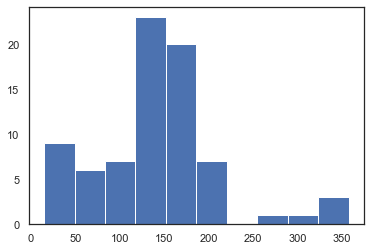

In [8]:
plt.hist(syn_df.Angle)

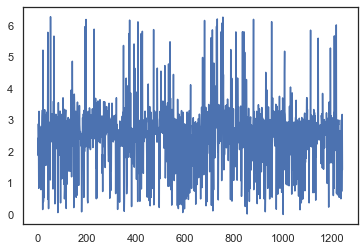

In [9]:
plt.plot(syn_storm_prop.Angle_rad)

(array([ 83.,  78., 102., 249., 508., 154.,  18.,  15.,  10.,  27.]),
 array([0.        , 0.62797131, 1.25594262, 1.88391393, 2.51188524,
        3.13985655, 3.76782786, 4.39579917, 5.02377048, 5.65174179,
        6.2797131 ]),
 <BarContainer object of 10 artists>)

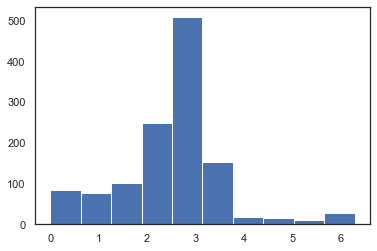

In [10]:
plt.hist(syn_storm_prop.Angle_rad)

In [11]:
hist_df

,Dist,Angle,Angle_rad
0,36.606629,88.567904,1.545802
1,26.567461,145.491477,2.539305
2,-67.651982,21.665241,0.378130
3,-32.453658,32.005383,0.558599
4,49.819845,147.994617,2.582993
5,51.845520,146.309932,2.553590
6,63.140391,153.434949,2.677945


0.024992191160251014 0.9996876464081216
88.56790381583261
-0.824041924199375 0.5665288228870544
145.49147701233235
0.9293567132263055 0.36918301637697065
21.665240614080336
0.8479983040050894 0.5299989400031777
32.005383208083344
-0.8479983040050915 0.5299989400031745
147.99461679191688
-0.8320502943378423 0.5547001962252313
146.30993247402006
-0.8944271909999159 0.4472135954999581
153.434948822922


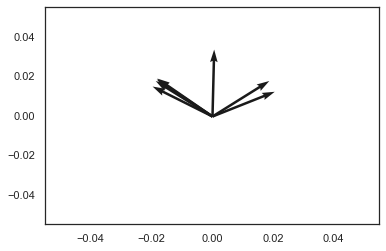

In [12]:
fig, ax = plt.subplots()

for i in range(len(hist_df)): #len(hist_df)
    print(np.cos(hist_df.Angle_rad[i]), np.sin(hist_df.Angle_rad[i]))
    print(hist_df.Angle[i])
    ax.quiver(0,0, np.cos(hist_df.Angle_rad[i]), np.sin(hist_df.Angle_rad[i]), scale = 5)
    

In [13]:
full_df = syn_df.append(hist_df)

In [14]:
hist_nod_df

,Dist,Angle,Angle_rad
0,-70.160998,147.050785,2.566520
1,-56.410580,135.000000,2.356194
2,-95.037858,173.990994,3.036716
3,-19.349112,110.556045,1.929567
4,-52.986330,138.814075,2.422763
5,-98.755706,153.434949,2.677945


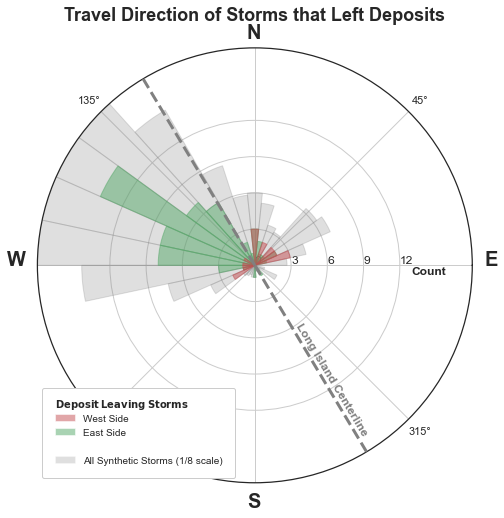

In [20]:

# radial_plot(syn_df)
# radial_plot(hist_df)


title = 'Travel Direction of Storms that Left Deposits'
radial_plot(full_df[full_df.Dist > -20], full_df[full_df.Dist < -20], ['West Side', 'East Side'], title)

# title = "Travel Direction of Storms Passing to the West of Long Island"
# radial_plot(full_df[full_df.Dist < -20], hist_nod_df, ['Deposit', 'No Deposit'], title)

# radial_plot(hist_nod_df)

In [19]:

def radial_plot(df, hist_nod_df, labels, title):
    
    N = int(360/12); bottom = 0

    # create theta 
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
#     print(theta)
    # width of each bin on the plot
    width = (2*np.pi) / N

    # make a polar plot
    plt.figure(figsize = (12, 8))
    ax = plt.subplot(111, polar=True)
    
    lab1, lab2 = labels
    
#     counts_all, bins_al, t = ax.hist(syn_storm_prop.Angle_rad, alpha = .25, bins = theta, color = 'gray',
#                                      edgecolor = 'gray', label = "All Synthetic Storms")
    counts_all, bins_al = np.histogram(syn_storm_prop.Angle_rad, bins = theta)
    ax.bar(bins_al[:-1]+np.diff(bins_al)[0]/2, counts_all/6, width=np.diff(bins_al)[0], bottom=0.0,  alpha=0.25,color = 'gray',
                                     edgecolor = 'gray' ,label = "All Synthetic Storms (1/8 scale)")
    

    ang = df["Angle_rad"]
    
    counts1, bins1, t =ax.hist(ang, alpha = .5, bins = theta, color = 'g', edgecolor = 'g', label = lab1) #width = np.pi/6
#     counts2, bins2, t =ax.hist(ang[df.Dist < 0], alpha = .5, bins = theta, edgecolor = 'r')
    
#     ax2 = ax.twinx()
    counts_nod, bins_nod, t =ax.hist(hist_nod_df.Angle_rad, alpha = .5, bins = theta, color = 'r',
                                     edgecolor = 'r', label = lab2)
    


    max_val = 2*max(counts1) - 10

    ax.text(0,max_val+1., 'E', fontsize = 20, fontweight = 'bold',bbox=dict(facecolor='white', alpha=1))
    ax.text(np.radians(92),max_val+.8, 'N', fontsize = 20, fontweight = 'bold',bbox=dict(facecolor='white', alpha=1))
    ax.text(np.radians(180),max_val+2.5, 'W', fontsize = 20, fontweight = 'bold',bbox=dict(facecolor='white', alpha=1))
    ax.text(np.radians(268.2),max_val+2, 'S', fontsize = 20, fontweight = 'bold',bbox=dict(facecolor='white', alpha=1))

    
    ax.vlines(np.deg2rad(120.9228), 0, max_val,'gray',linestyle = '--', linewidth = 3, zorder=3)
    ax.vlines(np.pi+np.deg2rad(120.9228), 0, max_val,'gray',linestyle = '--', linewidth = 3, zorder=3)

    label_position=120.9228
#     ax.text(180+np.radians(label_position),ax.get_rmax()/50,'Long Island Centerline',
#             rotation=180+label_position,ha='left',va='center') #     print(bins1)
    ax.text(np.pi+np.radians(label_position-18),max_val/1.25,'Long Island Centerline',
            rotation=180+label_position, color='gray', weight = 'bold') #     print(bins1)


    ax.set_theta_zero_location("E")
    ax.patch.set_facecolor('white'); ax.patch.set_alpha(0.5)
    
    ax.legend(fontsize = 15)#, bbox_to_anchor=(.5,ax.get_rmax()))
    h1, = ax.bar(0,0, color = "r", alpha = .5)
    h2, = ax.bar(0,0, color = "g", alpha = .5)
    h3, = ax.bar(0,0, color = "gray", alpha = .25)
    
    labels = [ ' ', 'West Side', 'East Side','', 'All Synthetic Storms (1/8 scale)']
    legend = ax.legend(['$\\bf{Deposit \: Leaving \: Storms}$', h1, h2, '',h3], labels, 
                        ncol=1, frameon=True, fontsize=10, borderpad = 1.25,
                      labelspacing=.5,  loc = "lower left", facecolor = 'w',handler_map={str: LegendTitle({'fontsize': 10})})

    legend.get_frame().set_alpha(None)

    if max_val>5:#max(counts1)+1 > 5:
        counts = list(np.arange(0,max(counts1)+1, 3).astype(int))
        
    else:
        counts = list(np.arange(1,max(counts1)+1, 1).astype(int))
    ax.set_rticks(counts)  # Less radial ticks
    ax.set_yticklabels(counts, fontsize=12)  
    ax.set_rlabel_position(0)  # Move radial labels away from plotted line
    label_position=ax.get_rlabel_position()
    ax.text(np.radians(label_position-2),max_val/1.25,'Count',
            rotation=label_position,ha='center',va='center', fontweight = 'bold')    

#     ax.set_xticklabels(['E', 'N', 'W', 'S'])
#     ax.legend()
    ax.set_title(title, fontsize = 18, fontweight = 'bold')
    ax.set_ylim([0,max_val])
    plt.show()

In [254]:
def polar_hist2d(df):
    # # define binning
    rbins = np.linspace(0,df.Dist.max(), 10)
    abins = np.linspace(0,2*np.pi, 30)

    #calculate histogram
    hist, _, _ = np.histogram2d(df.Angle_rad, df.Dist, bins=(abins, rbins))
    A, R = np.meshgrid(abins, rbins)

    # plot
    fig, ax = plt.subplots(figsize = (10,10), subplot_kw=dict(projection="polar"))

    pc = ax.pcolormesh(A, R, hist.T, cmap="viridis")

    ax.vlines(np.deg2rad(120.9228), 0, 45,'gray',linestyle = '--', linewidth = 3, zorder=3)
    ax.vlines(np.pi+np.deg2rad(120.9228), 0, 52,'gray',linestyle = '--', linewidth = 3, zorder=3)

    ax.plot(0,0,'r*', markersize = 20)


    ax.set_theta_zero_location("E")

    fig.colorbar(pc)

    plt.show()

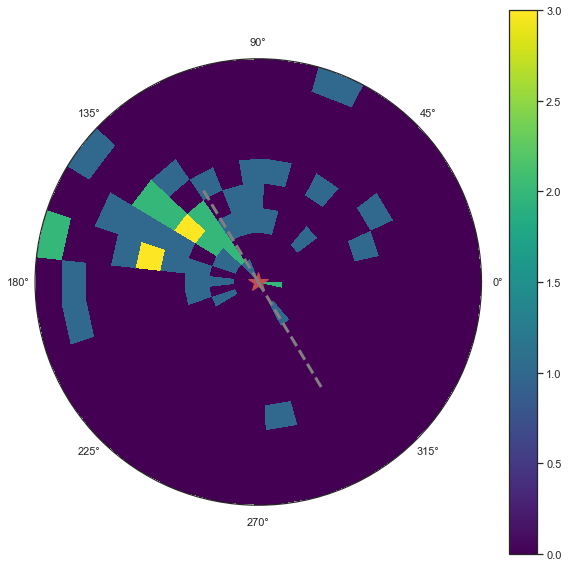

ValueError: `bins[1]` must be monotonically increasing, when an array

In [255]:
polar_hist2d(full_df)
polar_hist2d(full_df[full_df.Dist <-10])

In [253]:
full_df[full_df.Dist <-10]

,Dist,Angle,Angle_rad
2,-15.255632,149.036243,2.601173
4,-91.581902,36.869898,0.643501
7,-42.691980,15.018361,0.262120
12,-23.381938,30.141386,0.526066
15,-19.375386,189.021793,3.299053
16,-19.632781,160.435186,2.800122
17,-27.572907,185.550500,3.238467
19,-26.030696,198.940352,3.472164
20,-32.778373,172.838575,3.016602
22,-17.929143,351.158185,6.128867


In [153]:
##Visual representation of where storms passed

def radial_plot_direc(df):
    N = int(360/5); bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    print(theta)
    # width of each bin on the plot
    width = (2*np.pi) / N

    # make a polar plot
    plt.figure(figsize = (12, 8))
    ax = plt.subplot(111, polar=True)

    for direc in np.unique(storms.Direction):

        radii_s, tick_s = np.histogram(df["Angle of Passage"][df.Direction ==direc], bins = N)
        bars_s = ax.bar(theta, radii_s, width=width, bottom=bottom, label = direc, alpha = .5)


    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("E")
    ax.patch.set_facecolor('white'); ax.patch.set_alpha(0.5)

    ax.legend()
    ax.set_title("Direction of Storm Travel Past LIBH")

    plt.show()
    
    
radial_plot_direc(storms)
radial_plot_direc(storms[storms["Max Surge (m)"] >= .67])


NameError: name 'storms' is not defined